# Laboratorio 2.2: Clasificación

Bárbara Poblete, Felipe Bravo, Juglar Díaz, Mauricio Quezada, Hernán Sarmiento

**Abril 2019**

## =================== INTEGRANTES =====================

Escriba a continuación el nombre de los integrantes del presente laboratorio:

1. Sofía Valenzuela 

2. Guillermo Martínez

## =====================================================

# Instrucciones


1. El formato de entrega es un documento en **.html**, generado por jupyter.

2. El laboratorio debe realizarse en grupos de **2 personas**.

3. Asegúrese que están los nombres de los integrantes. Sólo uno de los integrantes debe subir este archivo a U-Cursos antes de finalizar la sesión. 

4. Las respuestas a cada pregunta se deben escribir en los bloques que dicen **RESPUESTA A PREGUNTA X.X**.

# Del Laboratorio 

En este laboratorio vamos a comparar clasificadores con cierto *baselines* o clasificadores base, y además vamos a trabajar con clases desbalanceadas. 

# Parte 1: Comparar clasificadores

Una de las principales tareas en enfoques supervisados es evaluar diferentes clasificadores y encontrar el mejor rendimiento de alguno de ellos. Por ejemplo, si tenemos dos (o más) clasificadores y queremos compararlos entre sí, nos interesa responder: *¿Cuál de los clasificadores es el mejor?* 
Para responder esta pregunta, no existe una única solución. 

Lo que haremos a continuación será ejecutar diferentes clasificadores y compararlos en base a las métricas de Precision, Recall y F1-score.

## Pregunta 1.1  

Para realizar la evaluación de distintos clasificadores, vamos a crear la función `run_classifier()`, la cual evalúa un clasificador `clf` recibido como parámetro un dataset `X,y` (dividido en training y testing) y un número de tests llamado `num_test`. Esta función almacena y retorna los valores de precision, recall y f1-score en la variable `metrics` además de los resultados de predicción.


En base a lo anterior, incluya las sentencias que ajusten el modelo junto a su correspondiente predicción sobre los datos. No use cross-validation ni tampoco el parámetro `random_state`.


### Respuesta 1.1

In [4]:
### COMPLETAR ESTE CÓDIGO

## run_classifier recibe un clasificador y un dataset dividido para entrenamiento y testing
## y opcionalmente la cantidad de resultados que se quiere obtener del clasificador

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score


def run_classifier(clf, X_train, X_test, y_train, y_test, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        ### INICIO COMPLETAR ACÁ 
        
        #### TIP: en base a los set de entrenamiento, genere la variable predictions 
        #### que contiene las predicciones del modelo
        clf.fit(X_train, y_train)
        predictions=clf.predict(X_test)
        
        ### FIN COMPLETAR ACÁ
        
        metrics['y_pred'] = predictions
        metrics['y_prob'] = clf.predict_proba(X_test)[:,1]
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    
    return metrics

Luego de completar el código anterior, ejecute el siguiente bloque para comparar los distintos clasificadores. 
Usaremos un **dataset de cáncer de mamas** para evaluar. Información del dataset la puede encontrar en el siguiente link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [5]:
## ejecutar este código

from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC  # support vector machine classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier

bc = load_breast_cancer()    # dataset cancer de mamas
X = bc.data
y = bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier())
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=5))

classifiers = [c0,c1, c2, c3]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X_train, X_test, y_train, y_test)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ",name) 
    print("Precision promedio:",np.array(metrics['precision']).mean())
    print("Recall promedio:",np.array(metrics['recall']).mean())
    print("F1-score promedio:",np.array(metrics['f1-score']).mean())
    print("----------------\n\n")
    

----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.6248055206540248
Recall promedio: 0.6225233644859813
F1-score promedio: 0.6232051502129103
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.9386405914490272
Recall promedio: 0.9531775700934578
F1-score promedio: 0.9458163482398948
----------------


----------------
Resultados para clasificador:  Gaussian Naive Bayes
Precision promedio: 0.9292035398230089
Recall promedio: 0.9813084112149534
F1-score promedio: 0.9545454545454546
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.9375
Recall promedio: 0.9813084112149534
F1-score promedio: 0.9589041095890409
----------------




### Pregunta 1.2

Analizando los resultados obtenidos de cada clasificador, y basándose en las métricas calculadas. ¿Cuál es el mejor clasificador? ¿Qué métricas observó para tomar esa decisión y por qué? Fundamente su respuesta.

### Respuesta 1.2
El mejor clasificador observado es el KNN. Si bien todas las métricas son mejores en general, la métrica más importante en este caso (debido a que corresponde a un dataset de cáncer de mamas) es el Recall promedio, porque queremos minimizar los falsos negativos. Se puede observar que el Recall promedio en Naive Bayes es el mismo que en KNN, pero las otras métricas siguen siendo mejores en KNN.


### Pregunta 1.3

Además de las métricas anteriores que fueron calculadas para cada clasificador, también es posible realizar una curva ROC que muestre la razón entre *Verdaderos Positivos* y *Falsos Positivos* según un umbral de discriminación. Ejecute las siguientes líneas de código que muestran el valor de AUC de cada clasificador y su gráfico correspondiente. ¿Qué observaciones puede obtener al respecto de los clasificadores evaluados?

AUC Base Dummy :0.49430490654205606
AUC Decision Tree :0.9219480140186915
AUC Gaussian Naive Bayes :0.9891939252336449
AUC KNN :0.97334988317757


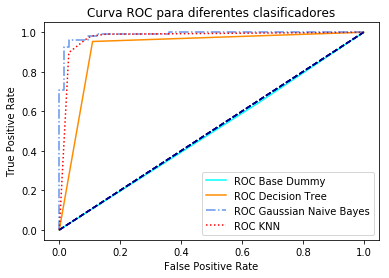

In [6]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 


def plot_roc_curve(fpr, tpr,name,colors_style):  
    plt.plot(fpr, tpr, color=colors_style[0], label='ROC '+name, linestyle = colors_style[1])
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC para diferentes clasificadores')
    plt.legend()

    
colors_style = [('aqua','-'), ('darkorange','-'), ('cornflowerblue', '-.'), ('red',':')]
i = 0
for name, metrics in results.items():
    auc = roc_auc_score(y_test, metrics['y_prob'])
    print('AUC '+name+' :'+ str(auc))
    fpr, tpr, thresholds = roc_curve(y_test, metrics['y_prob']) 
    plot_roc_curve(fpr, tpr, name, colors_style[i]) 
    i+= 1

### Respuesta 1.3

Nuevamente podemos observar que Base Dummy sigue siendo el peor caso, debido a su AUC muy próximo a 0.5, lo que nos indica que no tiene discriminación, es como lanzar una moneda. Considerando esta métrica, el método de clasificación Gaussian Naive Bayes está por sobre el resto, acercándose al ideal 1. Sin embargo, el método de clasificación KNN se encuentra bastante cercano.

---

# Parte 2: Tratando con clases desbalanceadas

Para mejorar el rendimiento de un clasificador sobre clases desbalanceadas existen varias técnicas. En esta parte, veremos cómo tratar con este problema usando (sub/over)sampling de las clases.

Descargue el dataset `unbalanced.csv` que está en el tutorial. 

(*Nota: Para ejecutar el siguiente bloque es necesaria la librería `pandas` que viene incluida en Anaconda.*)

In [4]:
import pandas as pd

# Cargamos dataset desbalanceado
# https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/unbalanced.csv  
data = pd.read_csv('unbalanced.csv')  # abrimos el archivo csv y lo cargamos en data.
data.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


Note el desbalance de las clases ejecutando el siguiente código:

In [5]:
print("Distribucion de clases original")
data['Class'].value_counts()

Distribucion de clases original


0    225
1    126
Name: Class, dtype: int64

Ahora, usando el dataset anterior, aplicaremos oversampling y subsampling para que queden balanceados. Ejecute el siguiente código y note ahora que las clases están balanceadas. 

In [6]:
import numpy as np

print("Distribución de clases usando (over/sub)sampling")
print()

# oversampling sobre la clase 1
idx = np.random.choice(data.loc[data.Class == 1].index, size=100)
data_oversampled = pd.concat([data, data.iloc[idx]])

print("Data oversampled on class '1'")
print(data_oversampled['Class'].value_counts())
print()

# subsampling sobre la clase 0
idx = np.random.choice(data.loc[data.Class == 0].index, size=100, replace=False)
data_subsampled = data.drop(data.iloc[idx].index)

print("Data subsampled on class '0'")
print(data_subsampled['Class'].value_counts())

Distribución de clases usando (over/sub)sampling

Data oversampled on class '1'
1    226
0    225
Name: Class, dtype: int64

Data subsampled on class '0'
1    126
0    125
Name: Class, dtype: int64


Para la siguiente pregunta, vamos a entrenar un árbol de decisión (`DecisionTreeClassifier`) sobre los 3 datasets por separado (**original**, con **oversampling** y con **subsampling**) y luego comparamos los resultados usando alguna métrica de evaluación.

Ejecute el siguiente bloque para cargar los datos:

In [7]:
## ejecutar este código para preparar los datos
from sklearn.metrics import classification_report

# Preparando los data frames para ser compatibles con sklearn

# datos originales 
X_orig = data[data.columns[:-1]] # todo hasta la penultima columna
y_orig = data[data.columns[-1]]  # la última columna

# datos "oversampleados" 
X_over = data_oversampled[data.columns[:-1]]
y_over = data_oversampled[data.columns[-1]]

# datos "subsampleados"
X_subs = data_subsampled[data.columns[:-1]]
y_subs = data_subsampled[data.columns[-1]]

## Pregunta 2.1

Complete el código necesario para ejecutar el clasificador en cada uno de los tres casos. Emplee como datos de entrada lo del bloque anterior. Para cada caso, divida el dataset en 80/20 para entrenar/testear, respectivamente. 

Muestre Precision, Recall y F1-score.


### RESPUESTA PREGUNTA 2.1 (agregue código en el siguiente bloque)

In [9]:
## RESPUESTA A PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Recuerde:
##  - instanciar el clasificador con DecisionTreeClassifier()
##  - dividir el dataset en 80/20
##  - entrenar con fit()
##  - hacer las predicciones
##  - Mostrar precision, recall y f1-score.


# Aca esta el codigo usando el dataset: original 
print("ORIGINAL::::::::::")
clf_orig = DecisionTreeClassifier()
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig, y_orig, test_size=0.2)
clf_orig.fit(X_orig_train,y_orig_train)
pred_orig = clf_orig.predict(X_orig_test)
print(classification_report(y_orig_test, pred_orig))

# Complete el resto para oversampling y subsampling 


print("OVERSAMPLING::::::::::")
clf_over = DecisionTreeClassifier()
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2)
clf_over.fit(X_over_train,y_over_train)
pred_over = clf_over.predict(X_over_test)
print(classification_report(y_over_test, pred_over))



print("SUBSAMPLING::::::::::")
clf_subs = DecisionTreeClassifier()
X_subs_train, X_subs_test, y_subs_train, y_subs_test = train_test_split(X_subs, y_subs, test_size=0.2)
clf_subs.fit(X_subs_train,y_subs_train)
pred_subs = clf_subs.predict(X_subs_test)
print(classification_report(y_subs_test, pred_subs))




ORIGINAL::::::::::
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.83      0.75      0.79        20

   micro avg       0.89      0.89      0.89        71
   macro avg       0.87      0.85      0.86        71
weighted avg       0.89      0.89      0.89        71

OVERSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.96      0.98      0.97        47

   micro avg       0.97      0.97      0.97        91
   macro avg       0.97      0.97      0.97        91
weighted avg       0.97      0.97      0.97        91

SUBSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.88      0.81      0.84        26

   micro avg       0.84      0.84      0.84        51
   macro avg       0.84      0.84      0.84        51
weighted a

## Pregunta 2.2

¿Cuál estrategia de sampling entrega mejores resultados para la clase minoritaria? 


### RESPUESTA A PREGUNTA 2.2
La estrategia oversampling entrega mejores resultados para la clase minoritaria.


## Pregunta 2.3

Indique una desventaja de usar oversampling y una desventaja de usar subsampling en clasificación.


### RESPUESTA A PREGUNTA 2.3
Usando subsampling se pierden datos, lo que genera una alta varianza en la predicción, por lo que la clasificación podría no ajustar lo suficiente.
Por otro lado, tomando la estrategia de oversampling que copia datos, se puede generar un bias, asignandole valor a alguna característica que realmente no es tan útil para la clasificación.
